# Introduction to Python for CS4200/CS5200

Yuri Kalnishkan

This document is an introduction to Python with `numpy`. This is not a substitute for any reference book on Python but just a sheet with a few ideas to get you started.  Items that are briefly covered here are:

* Vector and matrix creation/manipulation;
* Graphics with `matplotlib`
* Control structures and functions


## Working with Python on the Departmental Server

Connect to the departmental server `linux.cim.rhul.ac.uk` using *NoMachine*. 
You can work with Python in different ways. You can execute your Python program in the Unix shell with `python3`, which is an alias to the latest installed version. In this course we will mostly run Python commands in an interactive interpreter, where you can type a command, see the results, and reuse assigned variables later.

You can launch a Python interpreter with a convenient IDE and help system with `spyder3`. Otherwise you can run your commands in a Jupyter notebook. An advantage of a notebook is that you can save your commands with results and textual comments. You can launch Jupyter by typing `jupyter notebook` (here `notebook` is a code word, not a notebook name.) The system will run the kernel (i.e., a Python interpreter) somewhere in the background and it will interact with you through the front end displayed by your default browser.  

## Getting Help

By clicking `Help` in the Jupyter menu bar, you get links to useful help sources. 

Make sure you look through 

* **NumPy User Guide** at  https://docs.scipy.org/doc/numpy/user/index.html#user This is the official documentation site.

* **NumPy Tutorial** https://scipy.github.io/old-wiki/pages/Tentative_NumPy_Tutorial

* **Python Numpy Tutorial** at https://cs231n.github.io/python-numpy-tutorial/ This tutorial was written for the famous Stanford deep learning course.

Refer to these guides later if you need to clear any issue.


## Importing numpy

To start working with `numpy` we need to give the following command:

In [1]:
import numpy as np

This connects `numpy` libraries and sets `np` as a short alias to `numpy`. Of course, you can use other aliases, but `np` is a common convention.

## Vectors and Matrices

Python is a versatile programming language that can be used in many different ways and fashions. I have chosen `numpy` for this course because of its support of matrices.

In [2]:
v = np.array([1, 2, 3])

This creates a vector $v = (1, 2, 3)$. Unlike MATLAB, `numpy` does not distinguish between row and column vectors. When you perform matrix operations, `numpy` will try to guess how you intended to use the vector. This can be nice and convenient but can also be a source of confusion.

The variable `v` will from now on live in the notebook. You can view its value with either of the following:

In [3]:
v

array([1, 2, 3])

In [4]:
print(v)

[1 2 3]


This is how we create matrices:

In [5]:
M1 = np.array([[1,2,3],[4,5,6]])
M2 = np.array([[1,2],[3,4],[5,6]])

In [6]:
print(M1); print(M2)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


Unlike MATLAB, semicolons in Python are not used to suppress the output. Instead they separate statements written in one line.

The importance of the built-in `array` is that it allows us to write matrix operations concisely. Take three matrices:

In [7]:
one = np.array([[1,2],[3,4]])
two = np.array([[5,6],[7,8]])
three = np.array([[7,8],[9,10],[-1,-2]])

Matrix addition and subtraction can be done as follows: 

In [8]:
s = one + two
print(s)

[[ 6  8]
 [10 12]]


If the dimensions do not match, you get an error message. If you read it carefully, you will see that it complains about matrix shapes.

In [9]:
w = one+three

ValueError: operands could not be broadcast together with shapes (2,2) (3,2) 

**Remark** If you rerun a notebook (`Kernel -> Restart & Run All` from the menu) the cells will only be executed until the first error message. To continue execution, you need to use `Cell -> Run All Below`.

Now we proceed to matrix multiplication. By default, `*` performs element-wise multiplication:

In [10]:
element_prod = one*two
print(element_prod)

[[ 5 12]
 [21 32]]


The following generates an error message complaining of different matrix shapes. (Note that this would have make a legitimate matrix product!)

In [11]:
three*one

ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

In order to get a proper matrix product, you need to use one of the following.

In [12]:
matrix_prod = one.dot(two)
print(matrix_prod)

[[19 22]
 [43 50]]


In [13]:
same_prod = one @ two
print(same_prod)

[[19 22]
 [43 50]]


In [14]:
same_again = np.dot(one,two)
print(same_again)

[[19 22]
 [43 50]]


Notation `@` is convenient but dangerous, because it is easy to confuse with `&`, which is also a legitimate operator and may apply in this situation.

This is what happens if the dimensions do not match:

In [15]:
one @ three

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

If we transpose `three`, this becomes a legitimate product:

In [16]:
print(one@three.transpose())

[[ 23  29  -5]
 [ 53  67 -11]]


(I did not assign the result to a variable and used `print`, because I just want to see the result and do not intend to use it below.) 

Let us multiply a matrix by a vector. Now things get a bit tricky. Take a vector $u$ and a matrix $M$:

In [17]:
u = np.array([1,2])
M = one

In [18]:
print(M)

[[1 2]
 [3 4]]


In [19]:
print(u)

[1 2]


Now multiplication:

In [20]:
print(M @ u)

[ 5 11]


In [21]:
print(u @ M)

[ 7 10]


For a mathematician, this looks really surprising. If $u$ is a column vector, then the product $Mu$ exists, but the product $uM$ does not. For $uM$ to exist, $u$ must be a row vector. But if it is a row vector, then $Mu$ is no longer legitimate!

What happens is that `numpy` automatically transposes $u$ in such a way so that the product can be calculated. As we saw above, it only does this to vectors. Matrices do not get this treatment and `numpy` refused to calculate `one @ three` until we explicitly transposed `three`. 

Note also that $Mu$ is actually a column vector and $uM$ is a row vector. From the answers above you cannot tell!

You cannot interfere with this automatic transposing with explicit transposition of vectors:

In [22]:
print(M.dot(u.transpose())); print(u.transpose()@M)

[ 5 11]
[ 7 10]


But there is a way to turn a vector to a matrix explicitly if you really need to:

In [23]:
print(M.dot(u.reshape(2,1)));

[[ 5]
 [11]]


Here `reshape(2,1)` says that we need to use $u$ as a $(2\times 1)$-matrix. Note that the result is now unmistakeably a column!

A vector can be multiplied by itself. As we know from linear algebra, for a column vector $u$ we have $u'u =\|u\|^2$, so

In [24]:
print(u @ u)

5


One can multiply a matrix by a vector element-wise:

In [25]:
print(one*u)

[[1 4]
 [3 8]]


Now try multiplying `three` and `v` in different positions. Make sure you understand how the results are worked out.

In [26]:
print(v); print(three)

[1 2 3]
[[ 7  8]
 [ 9 10]
 [-1 -2]]


The power operator `**` works element-wise on matrices:

In [27]:
print(one**2)

[[ 1  4]
 [ 9 16]]


This is not the same as

In [28]:
print(one @ one)

[[ 7 10]
 [15 22]]


Power in the sense of matrix multiplication can be calculated with

In [29]:
print(np.linalg.matrix_power(one,2))

[[ 7 10]
 [15 22]]


See https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.linalg.html for various linear algebra functions.

## Building Large Matrices from Parts

You can create matrices from parts putting them together as follows. This operation is called concatenation. The parameter `axis` determines whether the matrices should be stacked left-to-right, or top-to-bottom:

In [30]:
print(np.concatenate((one,two),axis=0))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [31]:
print(np.concatenate((one,two),axis=1))

[[1 2 5 6]
 [3 4 7 8]]


We cannot concatenate a matrix to a vector, because the arguments need to be arrays of the same dimension. However, `reshape` can help.

In [32]:
print(np.concatenate((one,u.reshape(2,1)),axis=1))

[[1 2 1]
 [3 4 2]]


We can put concatenation operations together as follows

In [33]:
print(np.concatenate((np.concatenate((one,u.reshape(2,1)),axis=1),three.transpose()),axis=0))

[[ 1  2  1]
 [ 3  4  2]
 [ 7  9 -1]
 [ 8 10 -2]]


What is going to happen if you do not transpose `three`?

## Getting Parts of Matrices (Slicing)

Always remember that in Python elements of an array of size $n$ are numbered from $0$ to $n-1$. Python follows the approach of C and Java, rather than the approach of MATLAB or most mathematical texts. This is what it means for matrices:

In [34]:
print(M)

[[1 2]
 [3 4]]


In [35]:
print(M[1,1])

4


In [36]:
print(M[0,1])

2


Sometimes you may want to cut out a part of a large matrix. Let

In [37]:
L = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20]])
print(L)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


This is how you cut out one row or one column:

In [38]:
one_row = L[2,:]
one_row

array([11, 12, 13, 14, 15])

In [39]:
one_column = L[:,1]
one_column

array([ 2,  7, 12, 17])

Note that the results are vectors, not matrices.

This is how you can cut out a submatrix:

In [40]:
sub_L = L[0:2,1:4]
sub_L

array([[2, 3, 4],
       [7, 8, 9]])

The result may look surprising for MATLAB users, but you need to remember how Python deals with indices. Notation `0:2` denotes the range from 0 to 1 and notation `1:4` denotes the range from 1 to 3. So `numpy` has cut out the submatrix with rows 0 and 1 and columns 1, 2, and 3. 

You may think of it this way. In `m:n` $m$ is the number of the first element in the range, and $n$ is the number of the element _after_ the last. If you have ever wondered why this convention is used, read this note by Dijkstra: https://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html There are actually good reasons behind it.

A handy shortcut: the last element in an array can be accessed with with the index $-1$. You do not need to remember how many elements were there. For example,

In [41]:
M[-1,-1]

4

In [42]:
M[-1,-2]

3

## Special Matrices

In `numpy` there are operations for creating special matrices.

The range

In [43]:
A = np.array([0,1,2,3,4,5,6,7,8,9])
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

can be created as follows:

In [44]:
B = np.arange(10)
B

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can specify the starting point and the increment too:

In [45]:
print(np.arange(2,21,3))

[ 2  5  8 11 14 17 20]


This is how you can create a matrix of ones:

In [46]:
print(np.ones((3,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


You can find more functions for creating special matrices at https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.array-creation.html

**Exercise** Produce the following matrices by using special
matrices and other `numpy` tricks from previous sections (do not forget `reshape`).  Try making your construction as
short as possible.

$$
\begin{pmatrix}
1 & 2 & 3 & \ldots & 10\\
1 & 1 & 1 & \ldots & 1
\end{pmatrix}
$$

$$
\begin{pmatrix}
1 & 1^2 & 1^3\\
2 & 2^2 & 2^3\\
  &\vdots&   \\
10& 10^2& 10^3
\end{pmatrix}
$$

$$
\begin{pmatrix}
10 & 100 & 1000 & 10000 & 100000
\end{pmatrix}
$$

## Basic Plotting with mathplotlib

We will discuss simple MATLAB-style plotting using the library `mathplotlib`. First of all it needs to be imported:

In [47]:
import matplotlib.pyplot as plt

Let us plot a graph of $\sin x$. A simple plot is done by connecting the dots $(x,y)$. We need to start by generating them. First, we create a grid ox $x$ values with the step of $0.1$: 

In [48]:
x = np.arange(-10,10,0.1)

Then we apply $\sin$ to the array. Most mathematical functions can be applied to an array element-wise: 

In [49]:
y = np.sin(x)

Now we plot:

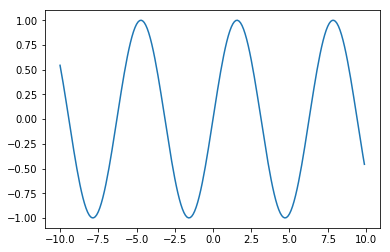

In [50]:
plt.plot(x,y)

See https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py for information on `plot` options. It is a versatile command allowing for customisation.

## Functions

Functions are written to avoid retyping the same sequence of commands. In Python you can define a function as follows:

In [51]:
def norm(v):
    # the function calculates the norm of vector v
    
    length = np.sqrt(v@v)
    
    return length

Here `def` is a keyword telling Python this is a function, `norm` is the function name given by me, and `v` is the function argument. The header line ends with a semicolon `:`. It should be there to tell Python that the function body follows. The notebook automatically indented (i.e., moved to the right) the function body following the semicolon. Importantly, in Python the indentations are not just a matter of style; they have semantic meaning and tell Python how to interpret your code. The body of a function **must** be indented (as an experiment, try to erase the white spaces in the function definition above).

The line starting with a hash `#` is a comment. Always use comments in your code to remind yourself what your code is doing.

The line `length = np.sqrt(v&v)` calculates the length on the input vector and the last line _returns_ it. A function may have several return statements; when the execution hits one of them, the value is returned and we exit the function.

The function can now be used as follows.

In [52]:
x = np.array([1,0,-1])
l = norm(x)
print(l)

1.4142135623730951


In [53]:
print(norm(x))

1.4142135623730951


In [54]:
print(norm(np.array([1,0,-1])))

1.4142135623730951


Note that the variable `length` does not exist outside of the function:

In [55]:
print(length)

NameError: name 'length' is not defined

It is a _local_ variable of the function `norm`.

You may want to save your function in a file. You need to create a file in the directory where your notebook is. Suppose that your file is called `norm_function.py` and contains the text

    def norm(v):
        # the function calculates the norm of vector v
        
        length = np.sqrt(v@v)
        return length

In order to use the function in your notebook, you need to import it with `from norm_function import norm`. Note that you need to write `norm_function`, not `norm_function.py`.

## Control Structures

Python supports all usual control structures. Here is an if-statement:

In [56]:
a = 4

if np.mod(a,2) == 0:
    print("a is even")
    b = a/2
else:
    print("a is odd")
    b = (a-1)/2

print(b)
        

a is even
2.0


Note the use of semicolons and indentations. Python uses neither `end` no brackets `{}` to mark that several commands are a part of the if-statement. Here `print(b)` is outside of the if-statement and is always executed because it is not indented.

Here is a for loop:

In [57]:
x = np.array([1,2,3])

for i in range(3):
    x[i] = x[i]**2
    
print(x)

[1 4 9]


We could have used `np.arange(3)` instead of `range(3)`; the later is a more common Python idiom.

The function `norm` can be written with loops as follows.

In [58]:
def norm_loop(v):
    # this function calculates the norm with a loop
    
    length2 = 0;
    for i in range(v.size):
        length2 += v[i]**2
        
    return np.sqrt(length2)

In [59]:
x = np.array([1,0,-1])
norm_loop(x)

1.4142135623730951

In [60]:
norm(x)

1.4142135623730951

The two functions calculate the same thing, but the function without explicit loops has two advantages:

* Its code is more concise. 

* If the size of the input is large, the function without loops will run faster.

Try the following:

In [61]:
x = np.random.randn(10000000)

In [62]:
norm(x)

3163.3672189308413

In [63]:
norm_loop(x)

3163.3672189308095

The technique of avoiding loops and relying on built-in matrix operations is called _vectorisation_. It produces code which is more concise and runs faster. However, vectorised code may be trickier to read and write for an uninitiated programmer.

In the coursework I welcome the vectorised code, but if you struggle with this concept, use loops.

**Exercise** Plot the graph showing the values of
$f(n)=\sum_{i=1}^n\frac 1i$ for $n=1,2,\ldots,1000$. _Hint:_ You
can calculate the values of $f(n)$ using a function with
loops. However there is a better way using the build-in function
`cumsum`. Read https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cumsum.html and try
`np.cumsum(np.array([1, 2, 3, 4]))` and `np.cumsum(np.array([1, 1, 1, 1]))` to see what it
does. There is a solution taking literally one short line.

Plot the logarithm $\ln n$ (`np.log` in `numpy`) on the same graph
and compare them. 